In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from scipy.sparse import hstack

In [2]:
# pip install SentenceTransformer

In [3]:
trains  = pd.read_csv('fake_job_postings.csv',encoding="ISO-8859-1")

In [4]:
trains

,Id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time youâve v...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting-Â Desire to have ...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [5]:
trains['fraudulent'].unique()

array([0, 1], dtype=int64)

In [6]:
trains['description'].unique()

array(['Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff',
       "Organised - Focused - Vibrant - Awesome!Do you have a passion for customer s

In [7]:
trains[trains['description'].isnull()].shape

(1, 18)

In [8]:
trains.isnull().sum()

Id                         0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [9]:
trains['department'].unique()

array(['Marketing', 'Success', nan, ..., 'Admin - Clerical',
       'Administrative Dept', 'Hospitality'], dtype=object)

In [10]:
trains['salary_range'].unique()

array([nan, '20000-28000', '100000-120000', '120000-150000',
       '50000-65000', '40000-50000', '60-80', '65000-70000', '75-115',
       '75000-110000', '17000-20000', '16000-28000', '95000-115000',
       '15000-18000', '50000-70000', '45000-60000', '30000-40000',
       '70000-90000', '10000-14000', '50-110', '28000-45000', '0-34300',
       '35000-40000', '09-Dec', '44000-57000', '18500-28000',
       '55000-75000', '30000-35000', '0-0', '20000-40000',
       '360000-600000', '50000-80000', '80000-100000', '52000-78000',
       '15750-15750', '40000-65000', '45000-50000', '30000-37000',
       '45000-67000', '35000-100000', '180000-216000', '45000-65000',
       '28000-32000', '0-1000', '36000-40000', '80000-110000',
       '35000-73000', '19000-19000', '60000-120000', '120000-15000000',
       '42000-55000', '90000-120000', '100000-150000', '28000-38000',
       '1600-1700', '50000-60000', '30000-70000', '32000-40000', '50-100',
       '9000-17000', '23040-28800', '105-110', '130

In [11]:
del_cols=['Id','location','department','salary_range','title','company_profile','benefits','requirements','industry']


In [12]:
train=trains.drop(del_cols,axis=1)

In [13]:
col_list=list(train.columns)

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
for i in col_list:
    if train[i].dtype=='object':
        train[i]=train[i].replace(np.nan,train[i].mode()[0],regex=True)

In [16]:
train.isnull().sum()

description            0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
function               0
fraudulent             0
dtype: int64

In [17]:
train[train['fraudulent']==0].head(200)

,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",0,1,0,Other,Internship,Bachelor's Degree,Marketing,0
1,Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Customer Service,0
2,"Our client, located in Houston, is actively se...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology,0
3,THE COMPANY: ESRI â Environmental Systems Re...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...
199,"As an Outside Sales Representative, you must h...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology,0
200,This is a new role. We are looking for a (mid ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Advertising,0
201,We currently have a vacancy for a JAVA Solutio...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology,0
202,"Play with kids, get paid for itÂ Love travel? ...",0,1,1,Contract,Mid-Senior level,Bachelor's Degree,Information Technology,0


In [18]:
train[train['fraudulent']==1].head(200)

,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent
98,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...",0,1,1,Full-time,Mid-Senior level,High School or equivalent,Other,1
144,The group has raised a fund for the purchase o...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology,1
173,Technician Instrument &amp; ControlsLocation D...,0,1,1,Full-time,Mid-Senior level,Certification,Other,1
180,Sales Executive,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,1
215,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...",0,1,1,Full-time,Mid-Senior level,High School or equivalent,Other,1
...,...,...,...,...,...,...,...,...,...
5443,Title: Controls EngineerDuration: Long term co...,0,1,1,Full-time,Mid-Senior level,Associate Degree,Engineering,1
5444,Responsible for all food production including ...,0,1,0,Full-time,Executive,Bachelor's Degree,Other,1
5450,Dyson demonstrators work part-time as members ...,0,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology,1
5451,Arise Virtual Solutions is a business process ...,1,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology,1


In [19]:
train.isnull().sum()

description            0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
function               0
fraudulent             0
dtype: int64

In [20]:
plt.rcParams["figure.figsize"] = (30,20)


In [21]:
train['employment_type'].unique()

array(['Other', 'Full-time', 'Part-time', 'Contract', 'Temporary'],
      dtype=object)

<Axes: xlabel='employment_type', ylabel='fraudulent'>

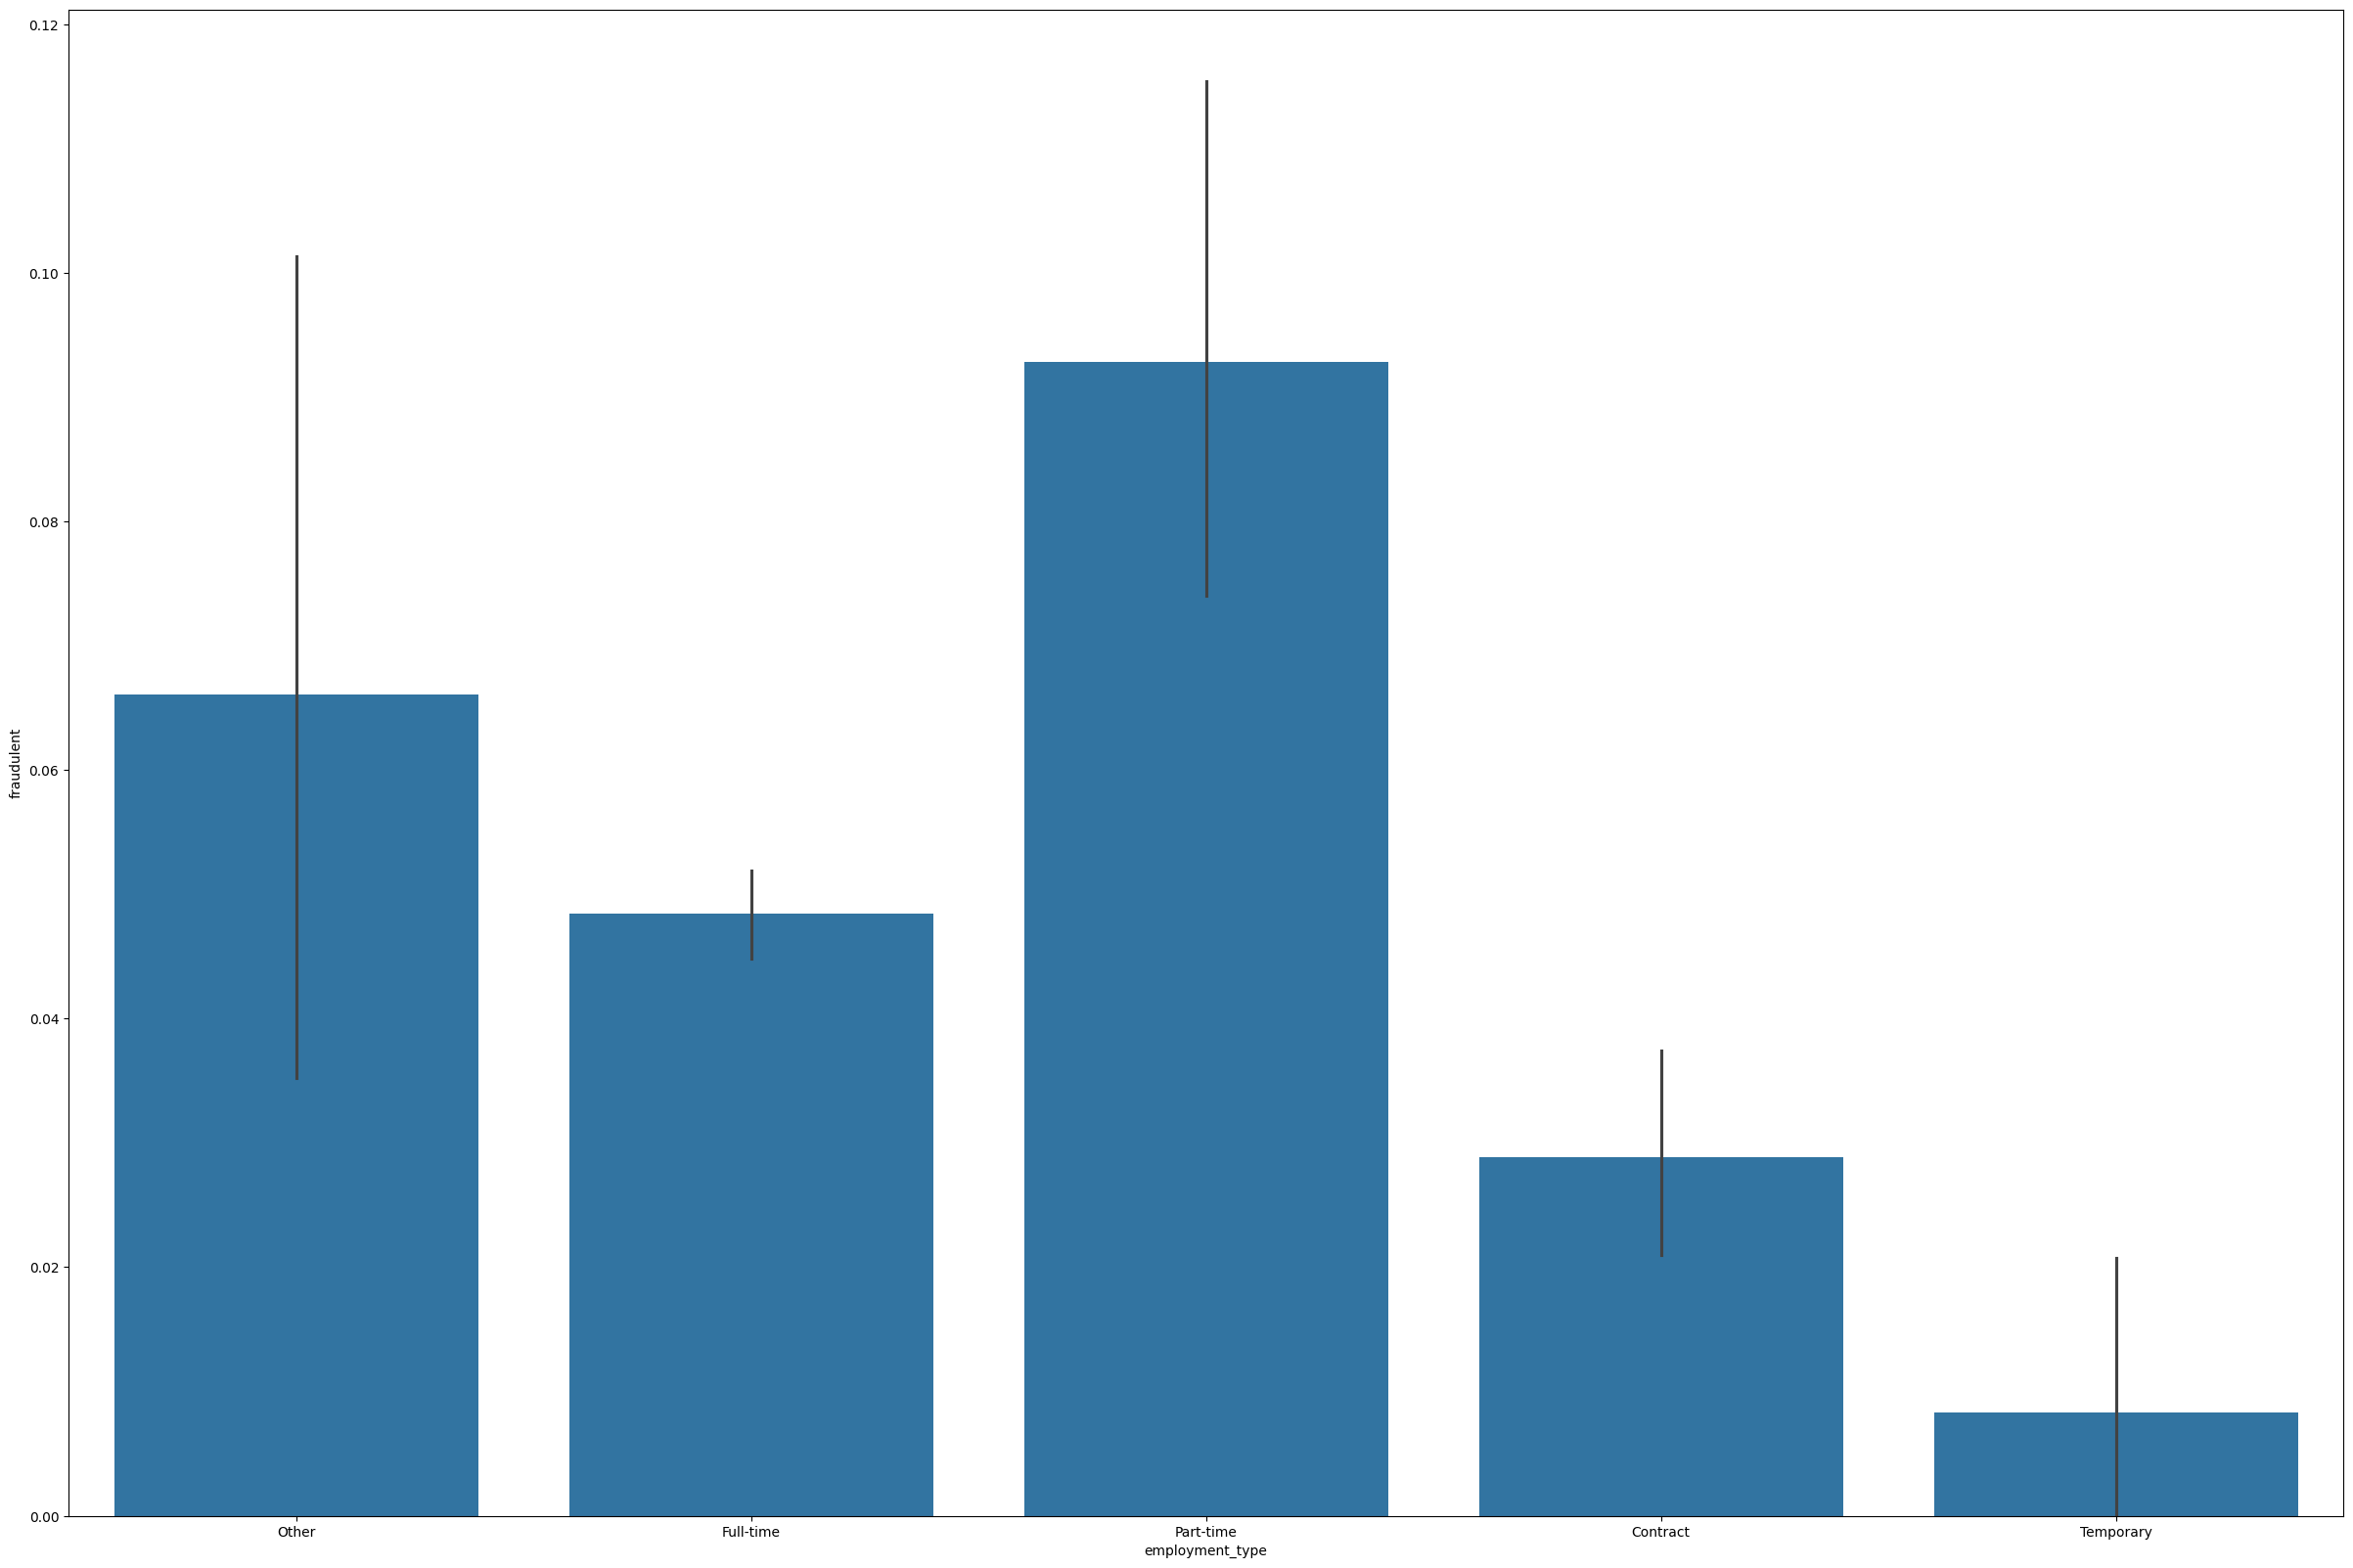

In [22]:
sns.barplot(x='employment_type', y='fraudulent', data=train)


In [23]:
train['required_experience'].unique()

array(['Internship', 'Not Applicable', 'Mid-Senior level', 'Associate',
       'Entry level', 'Executive', 'Director'], dtype=object)

<Axes: xlabel='required_experience', ylabel='fraudulent'>

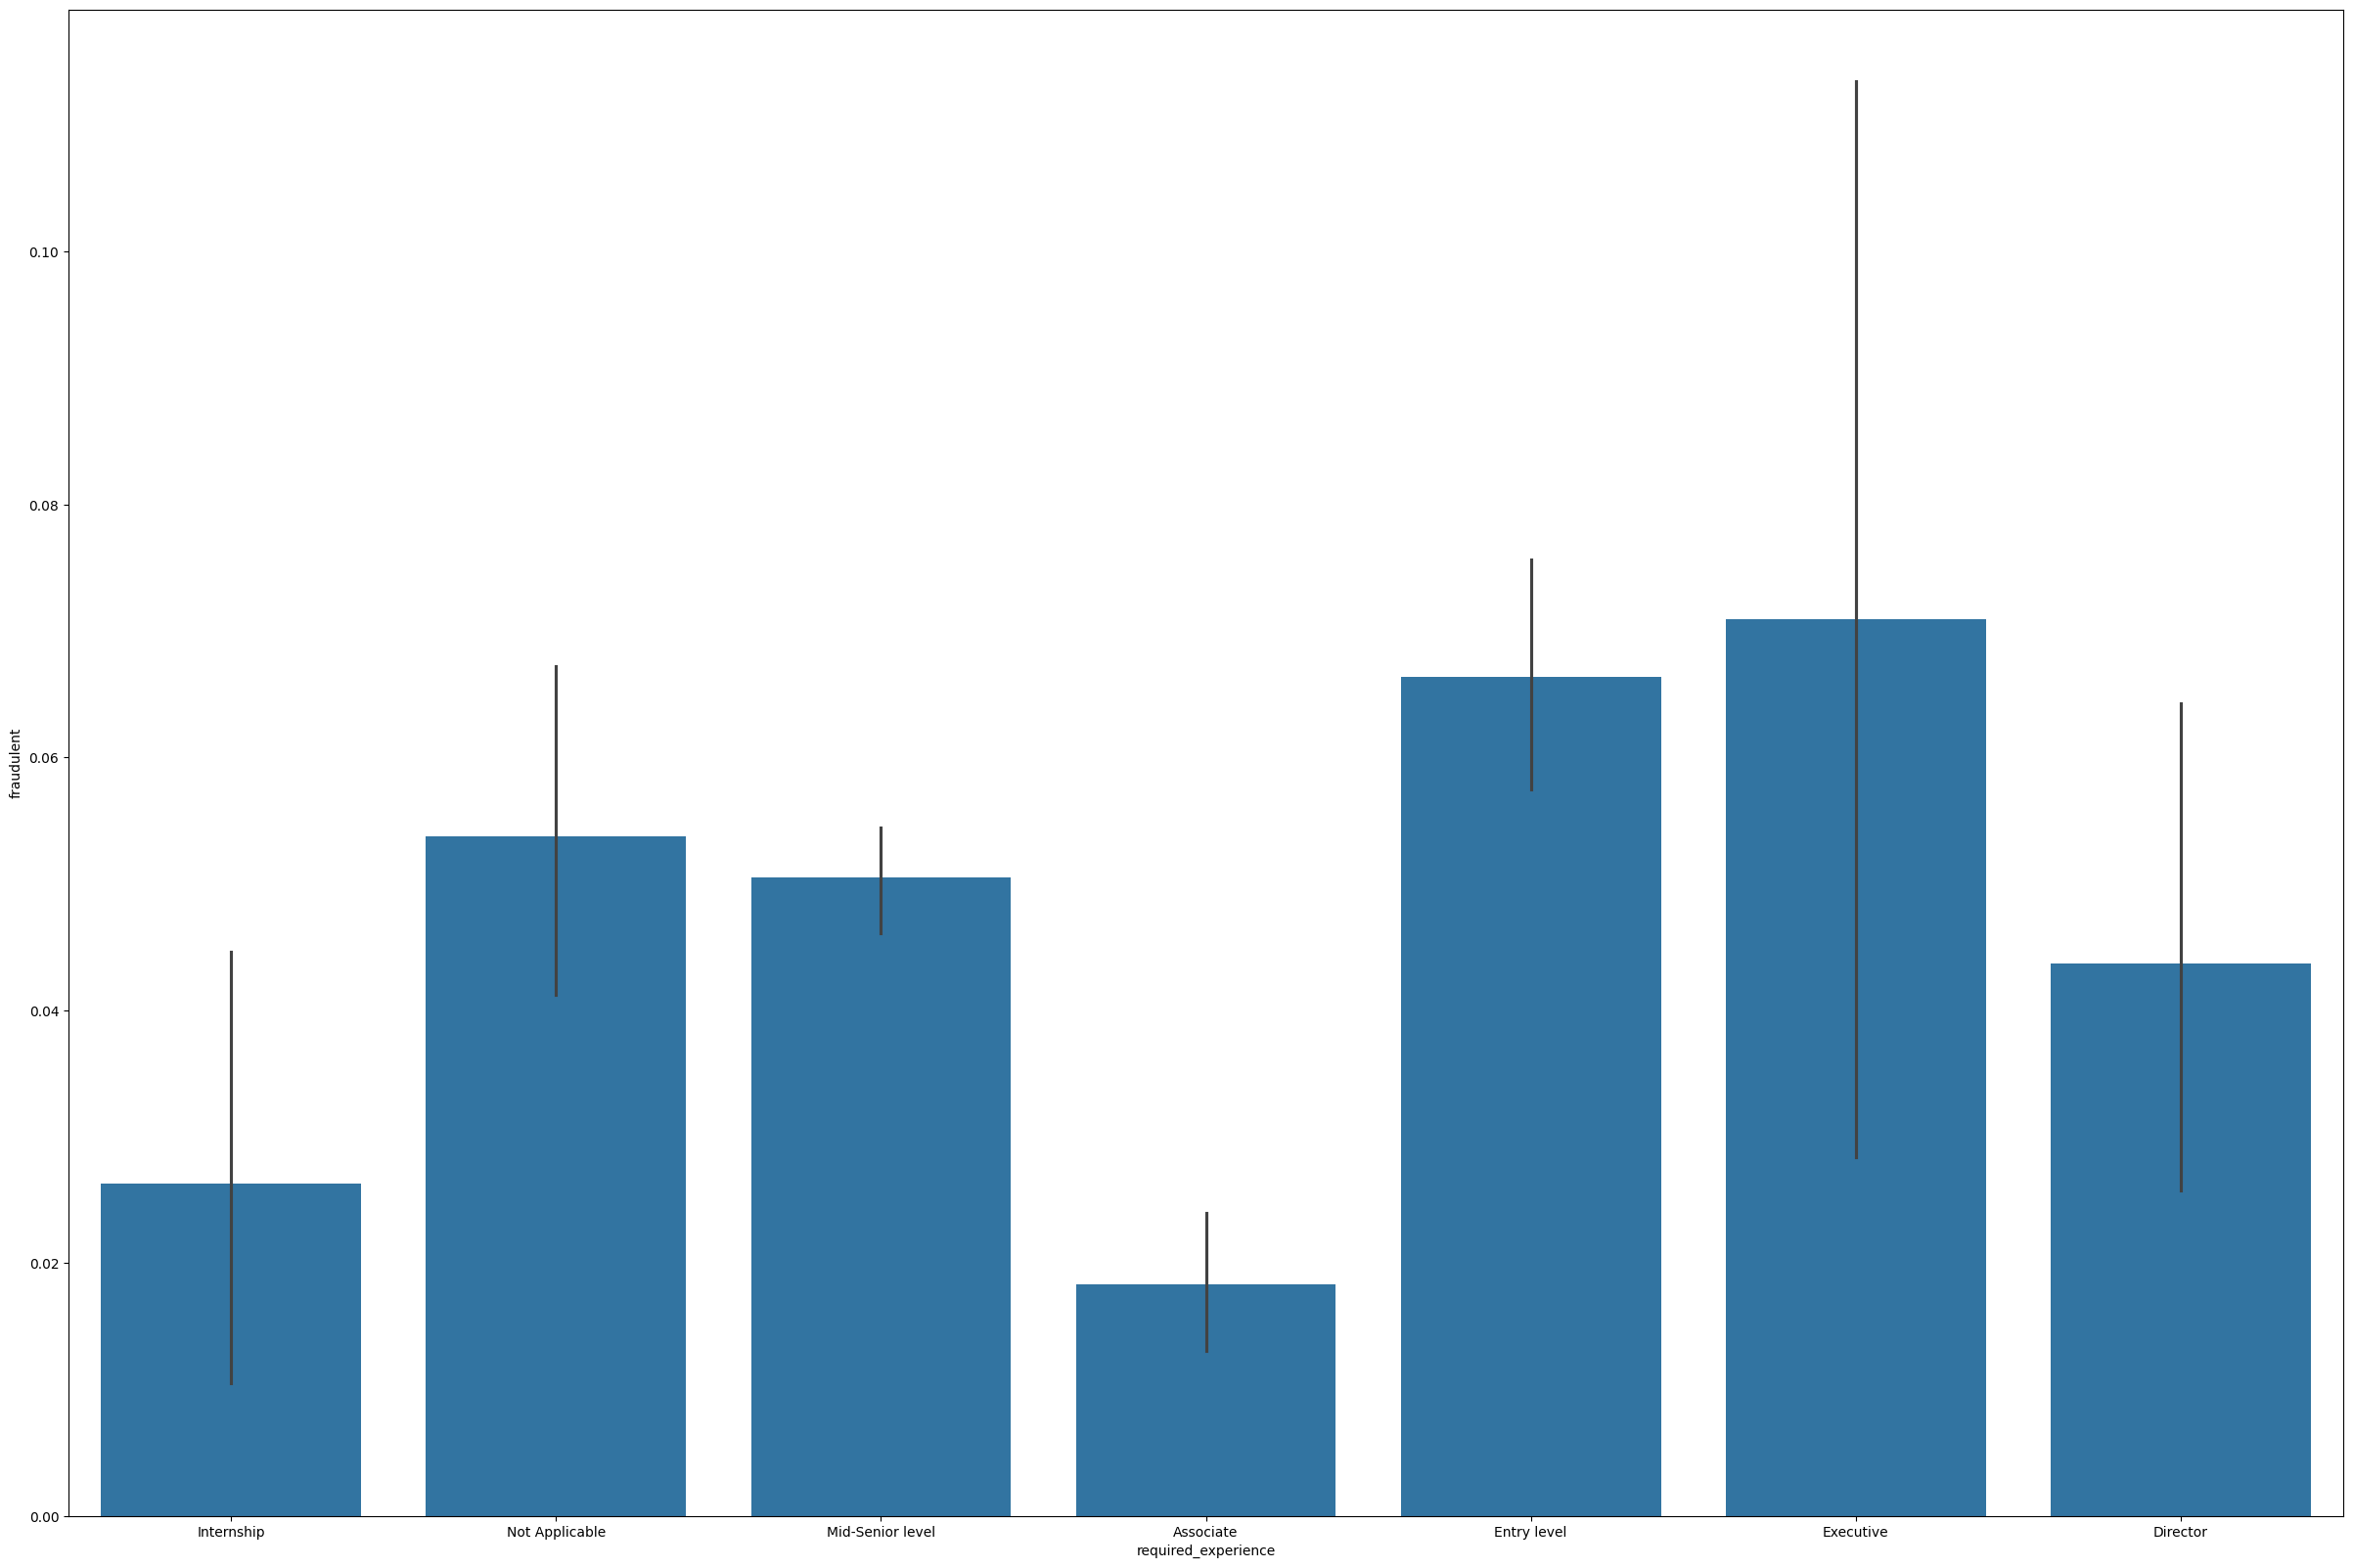

In [24]:
sns.barplot(x='required_experience', y='fraudulent', data=train)


<Axes: xlabel='required_education', ylabel='fraudulent'>

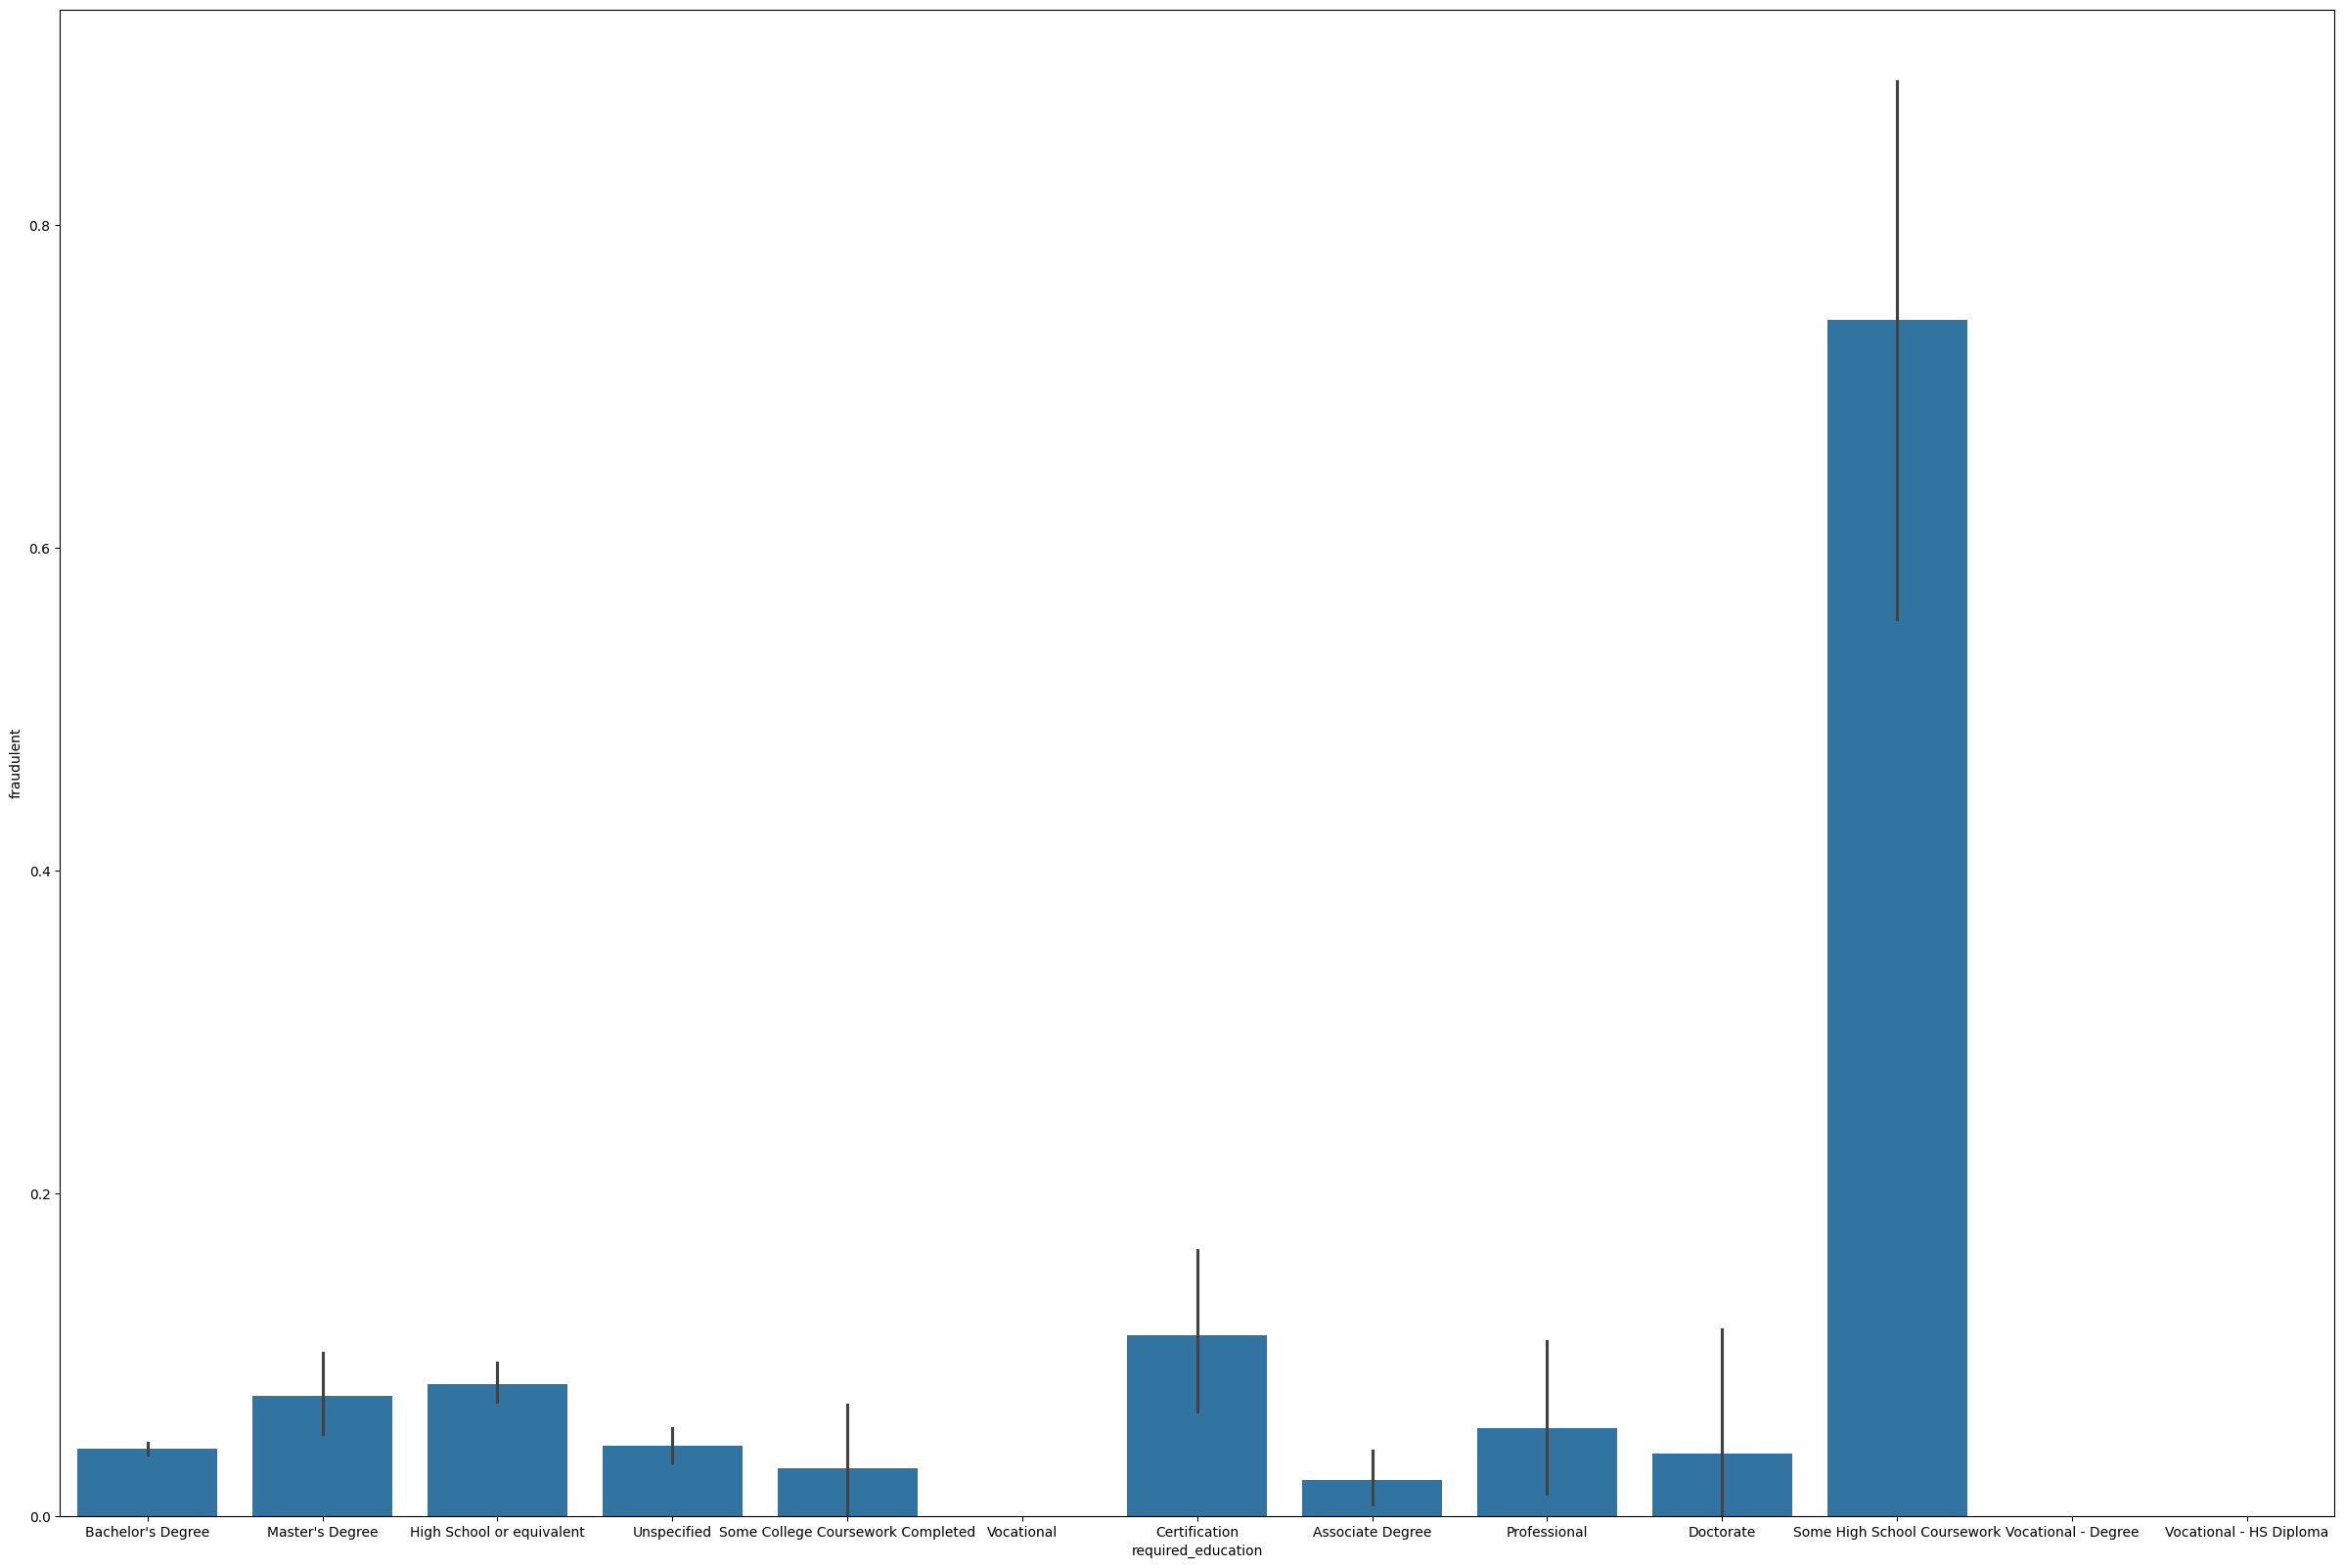

In [25]:
sns.barplot(x='required_education', y='fraudulent', data=train)


<Axes: xlabel='function', ylabel='fraudulent'>

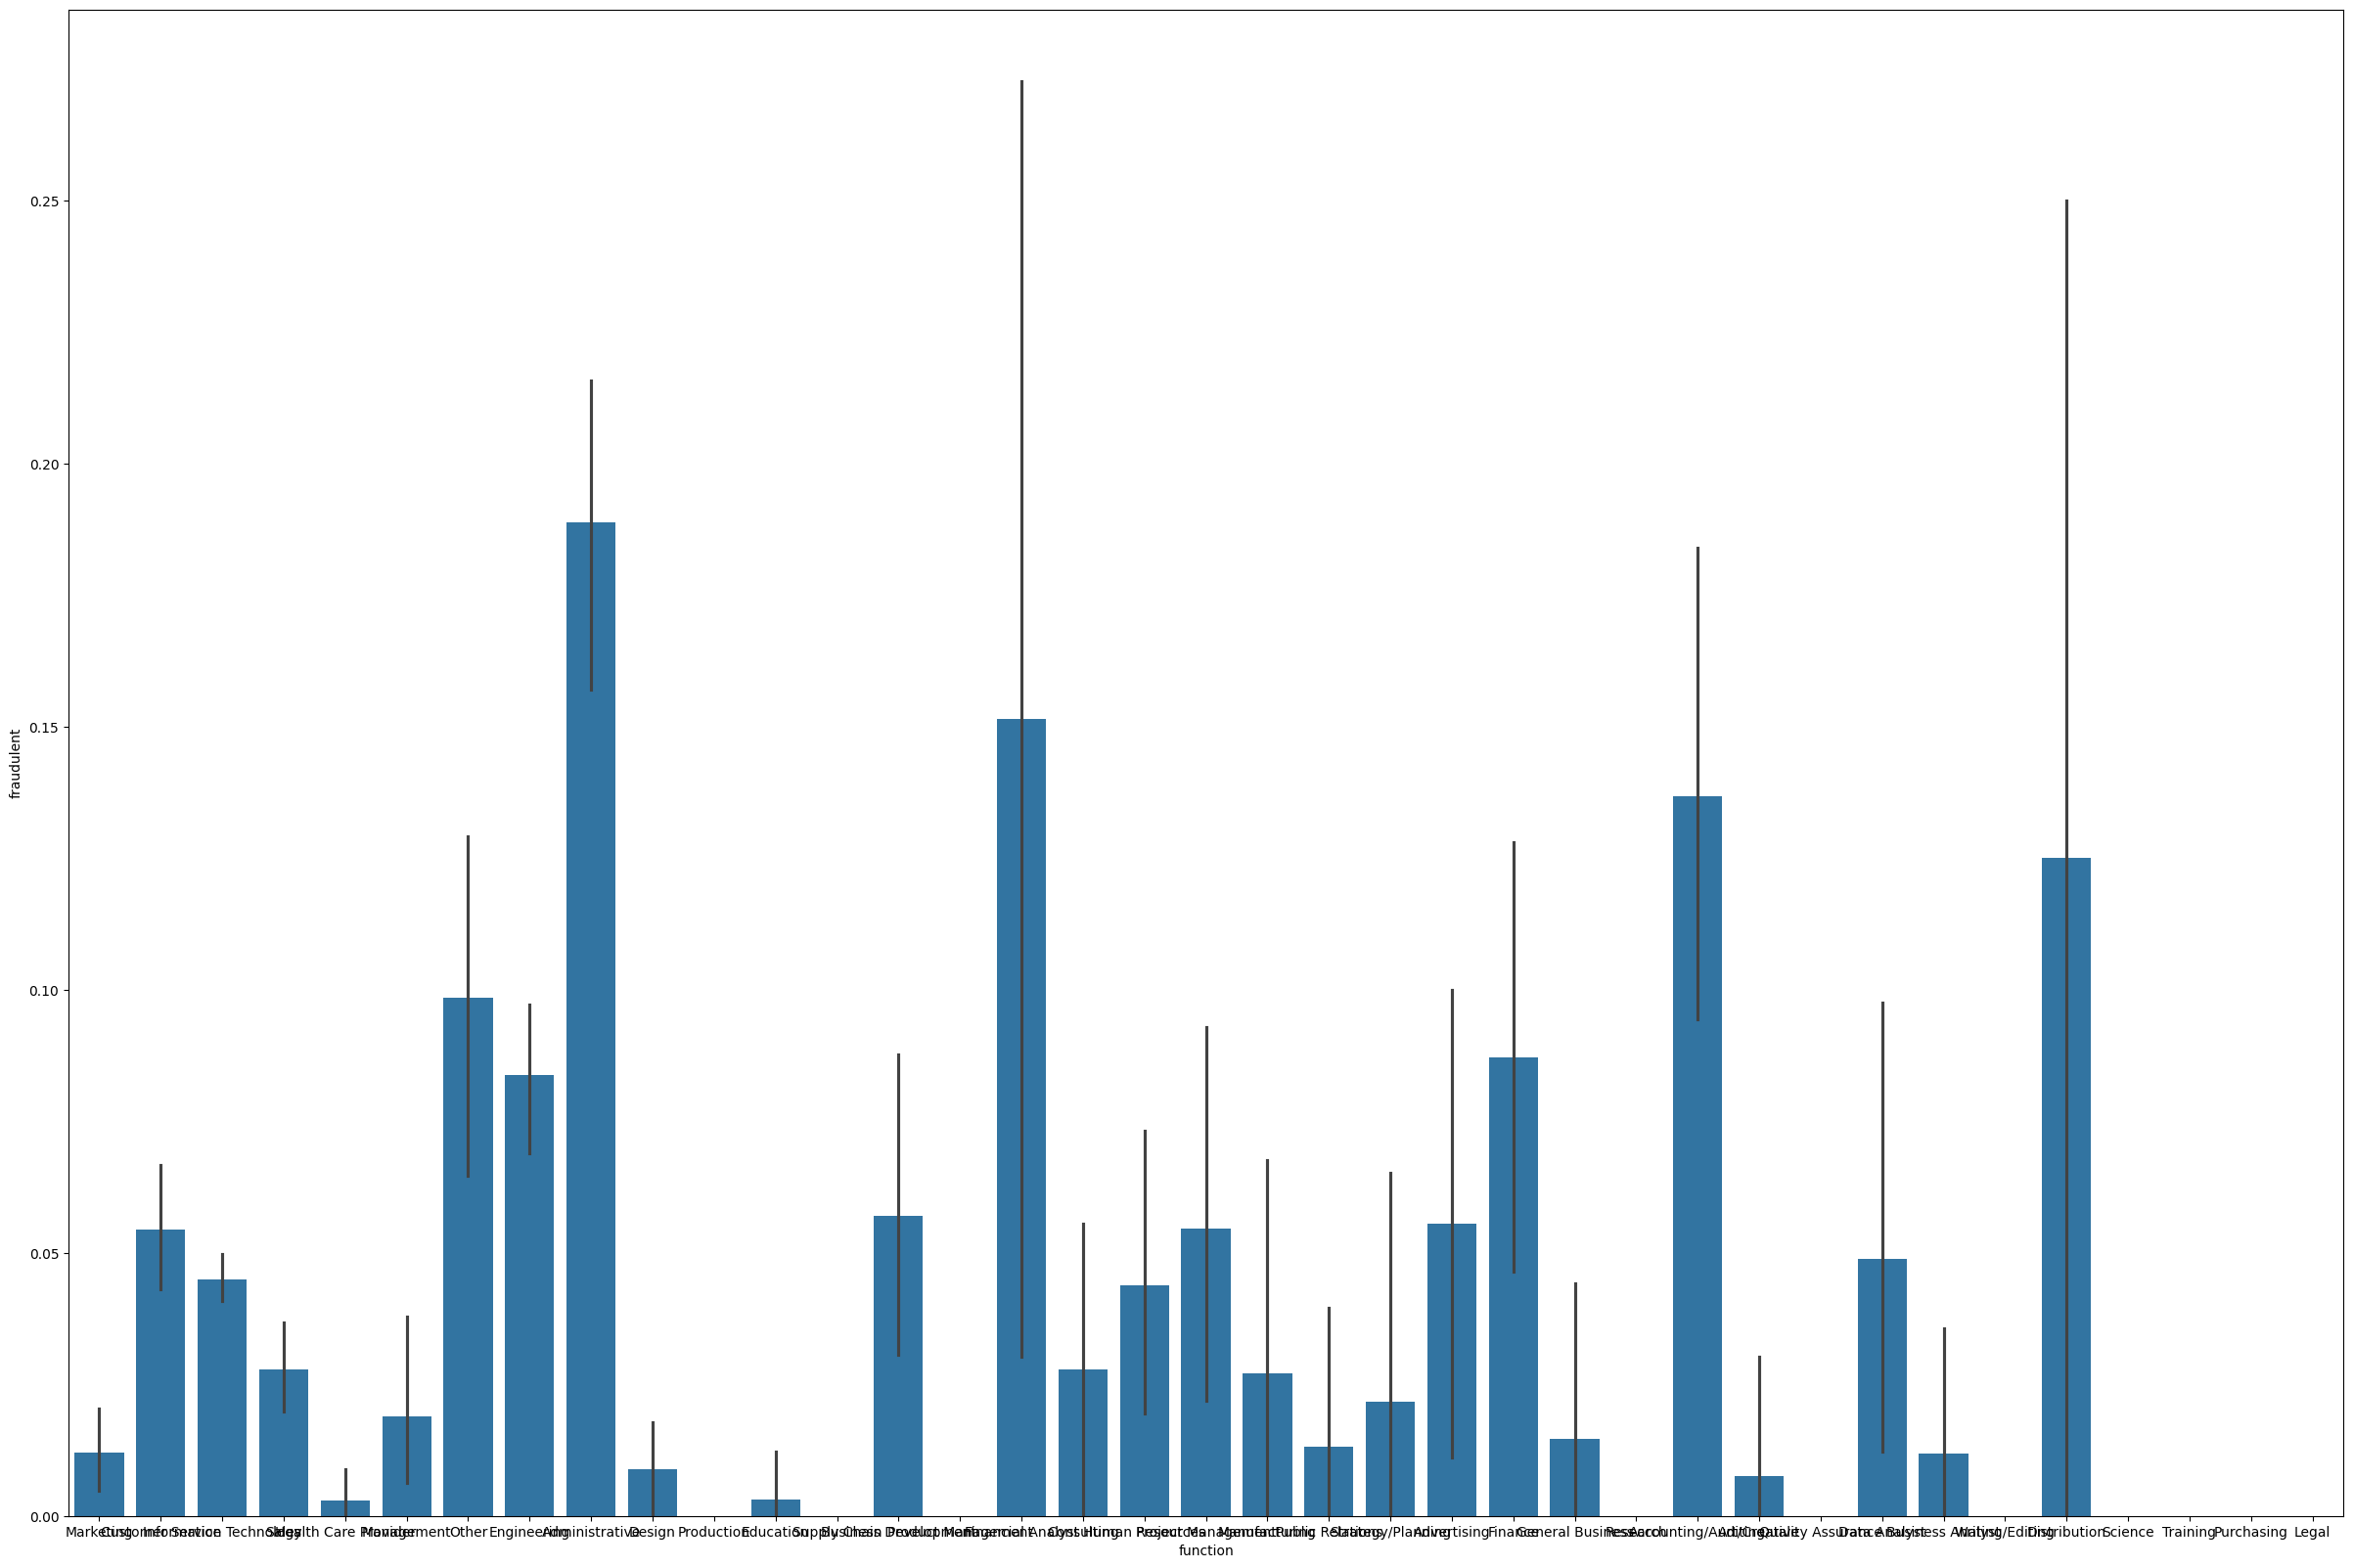

In [26]:
sns.barplot(x='function', y='fraudulent', data=train)


<Axes: xlabel='has_company_logo', ylabel='fraudulent'>

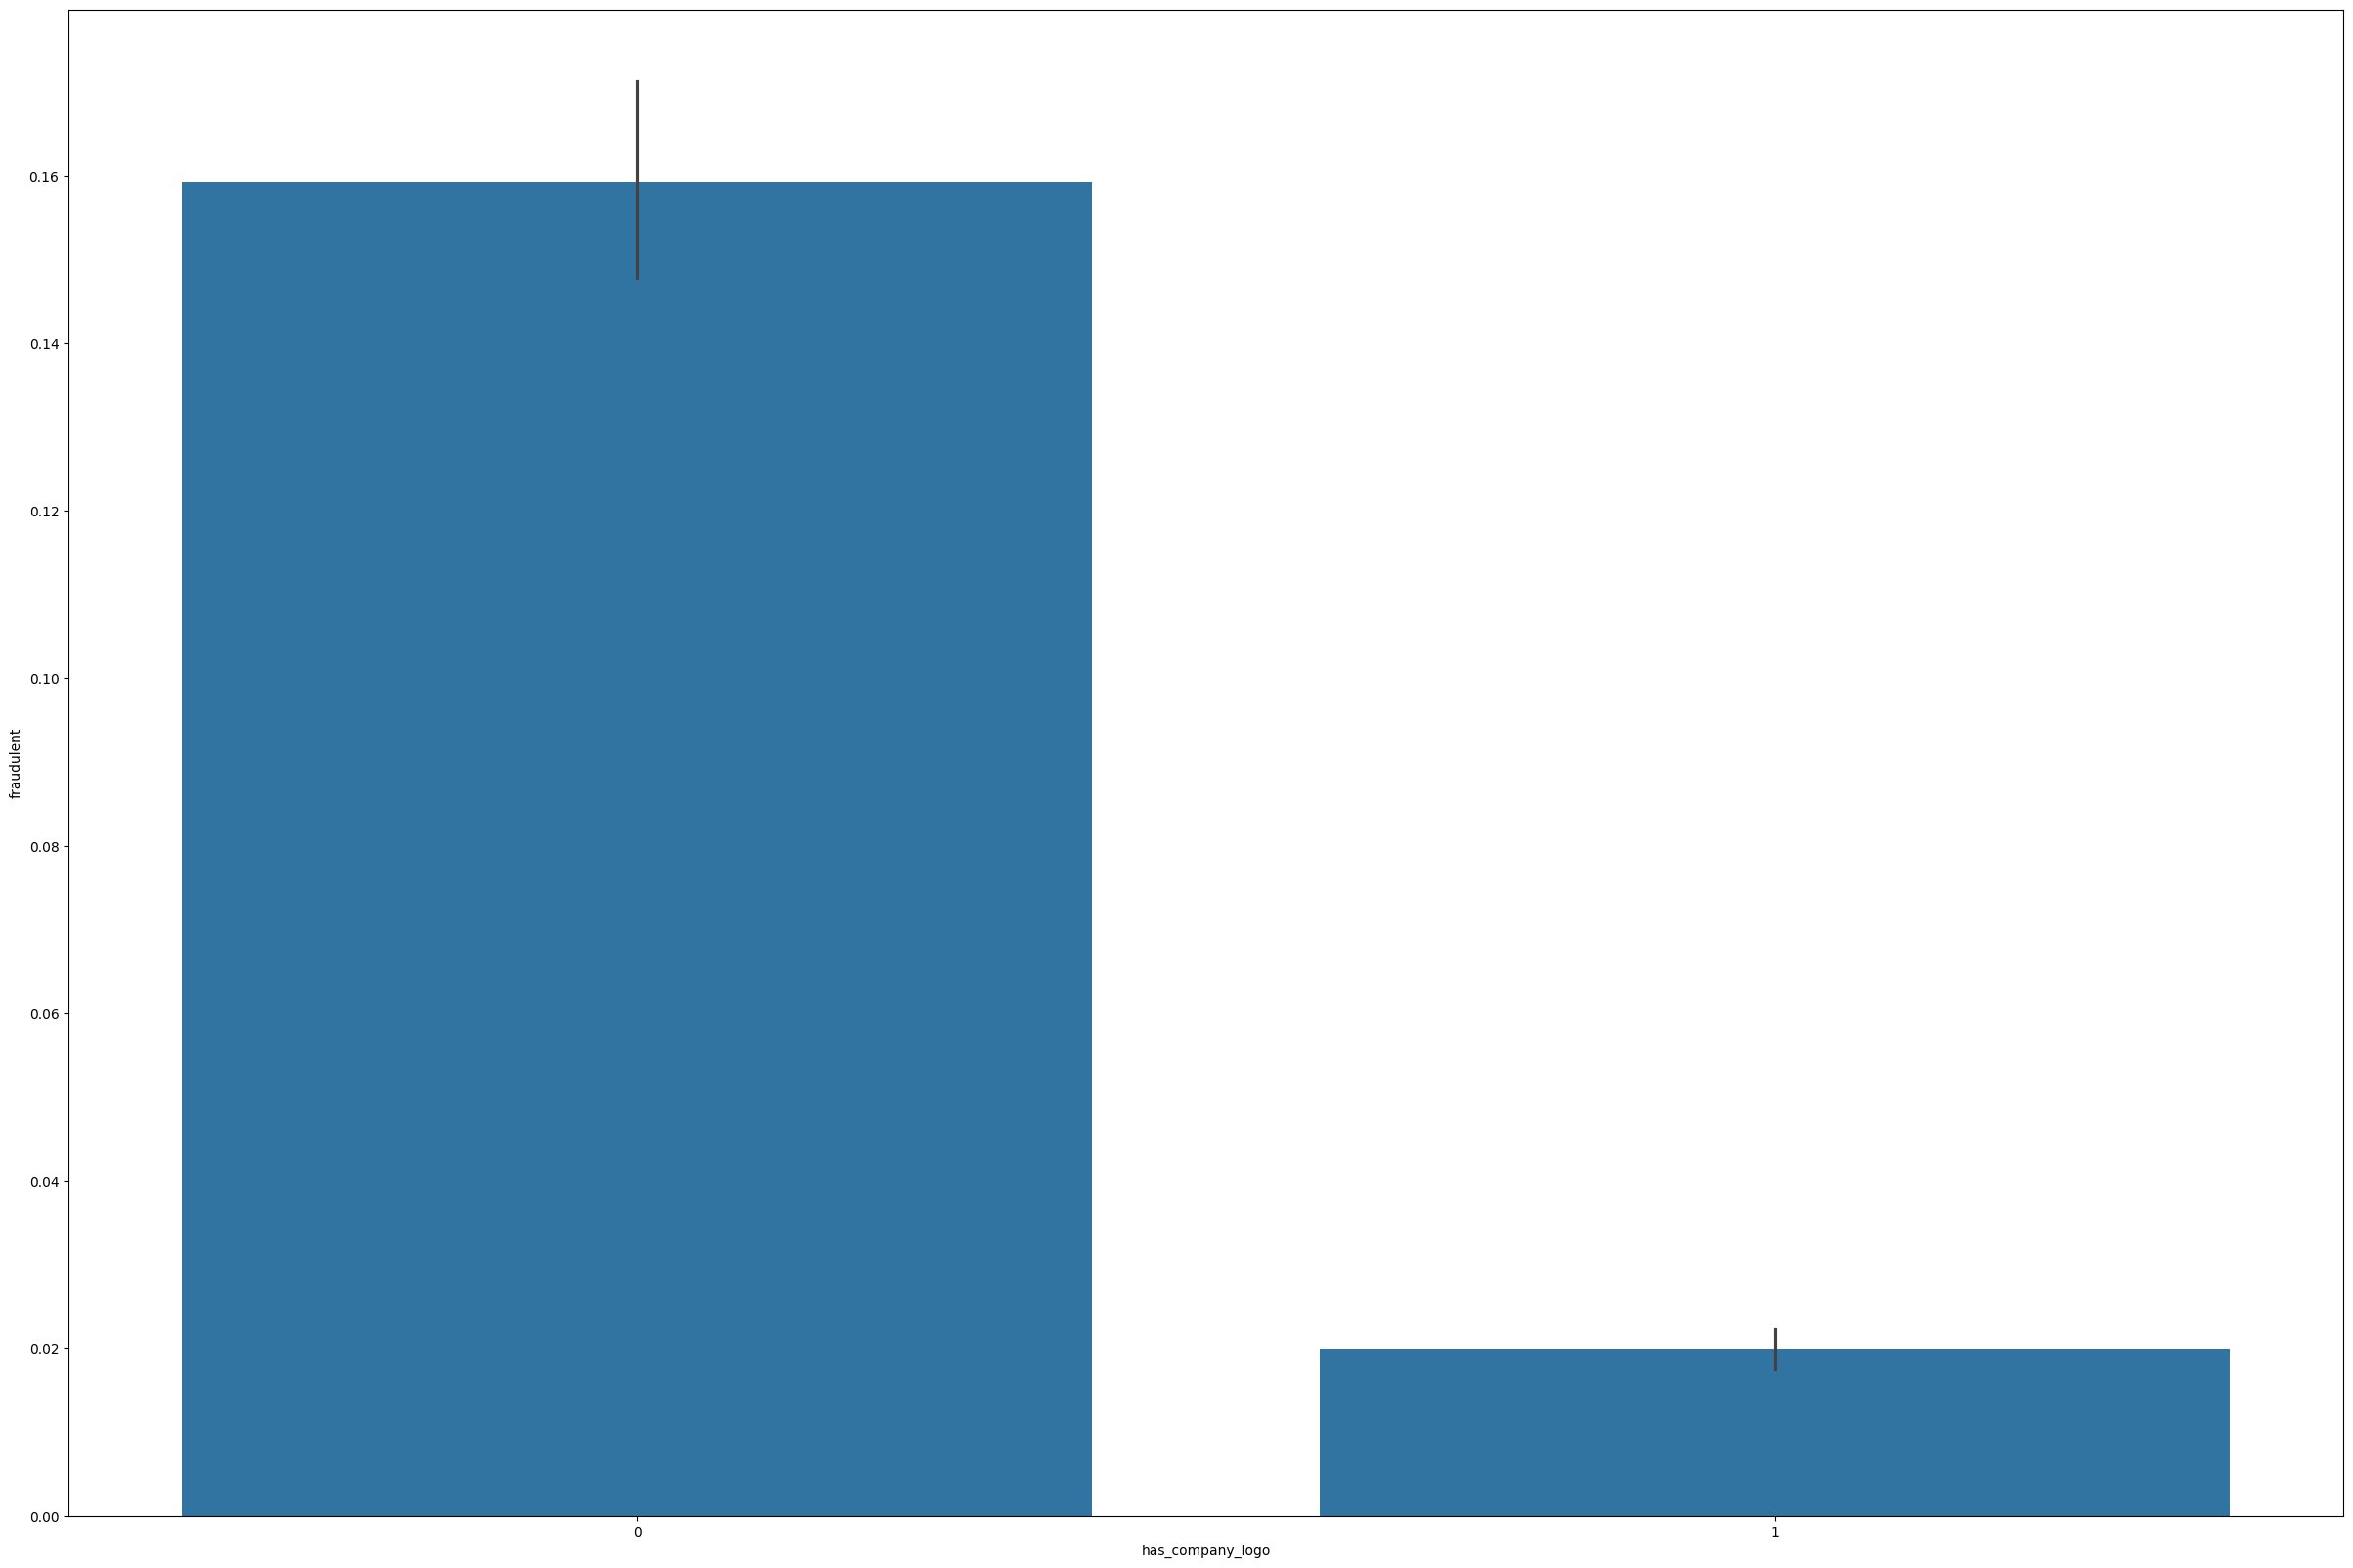

In [27]:
sns.barplot(x='has_company_logo', y='fraudulent', data=train)


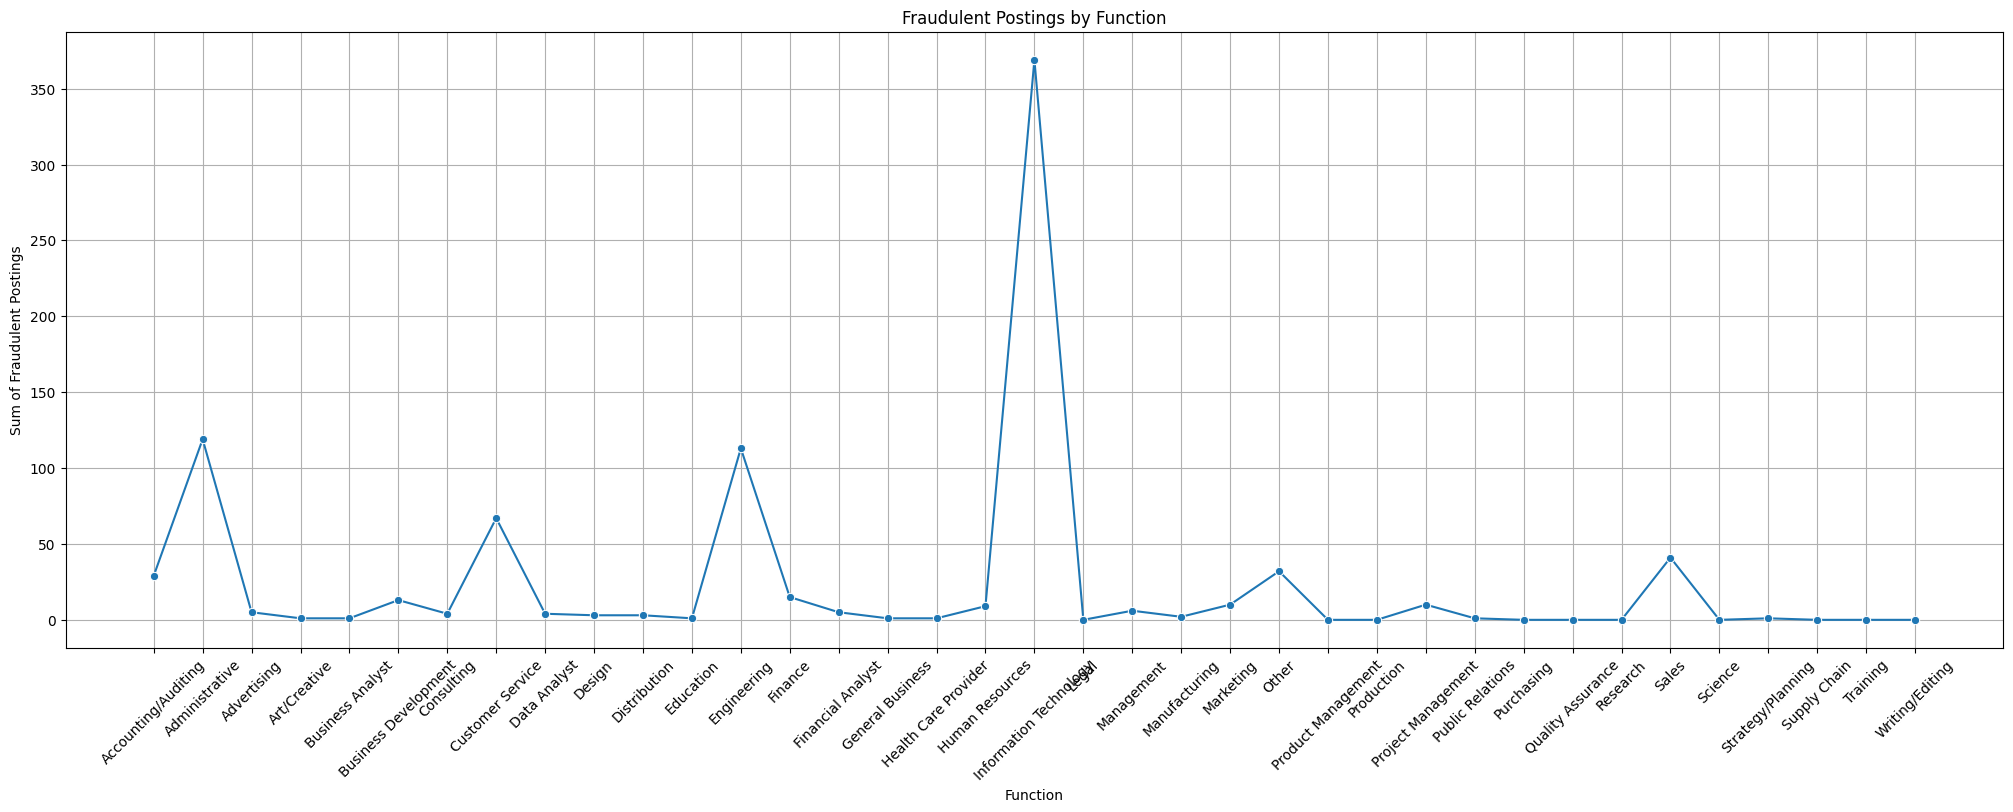

In [28]:
# Calculate the sum of fraudulent postings by function
fraudulent_summary = train.groupby('function')['fraudulent'].sum().reset_index()

plt.figure(figsize=(25, 8))
sns.lineplot(data=fraudulent_summary, x='function', y='fraudulent', marker='o')
plt.title('Fraudulent Postings by Function')
plt.xlabel('Function')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.grid(True) 
plt.show()

Text(0, 0.5, 'No. of Jobs')

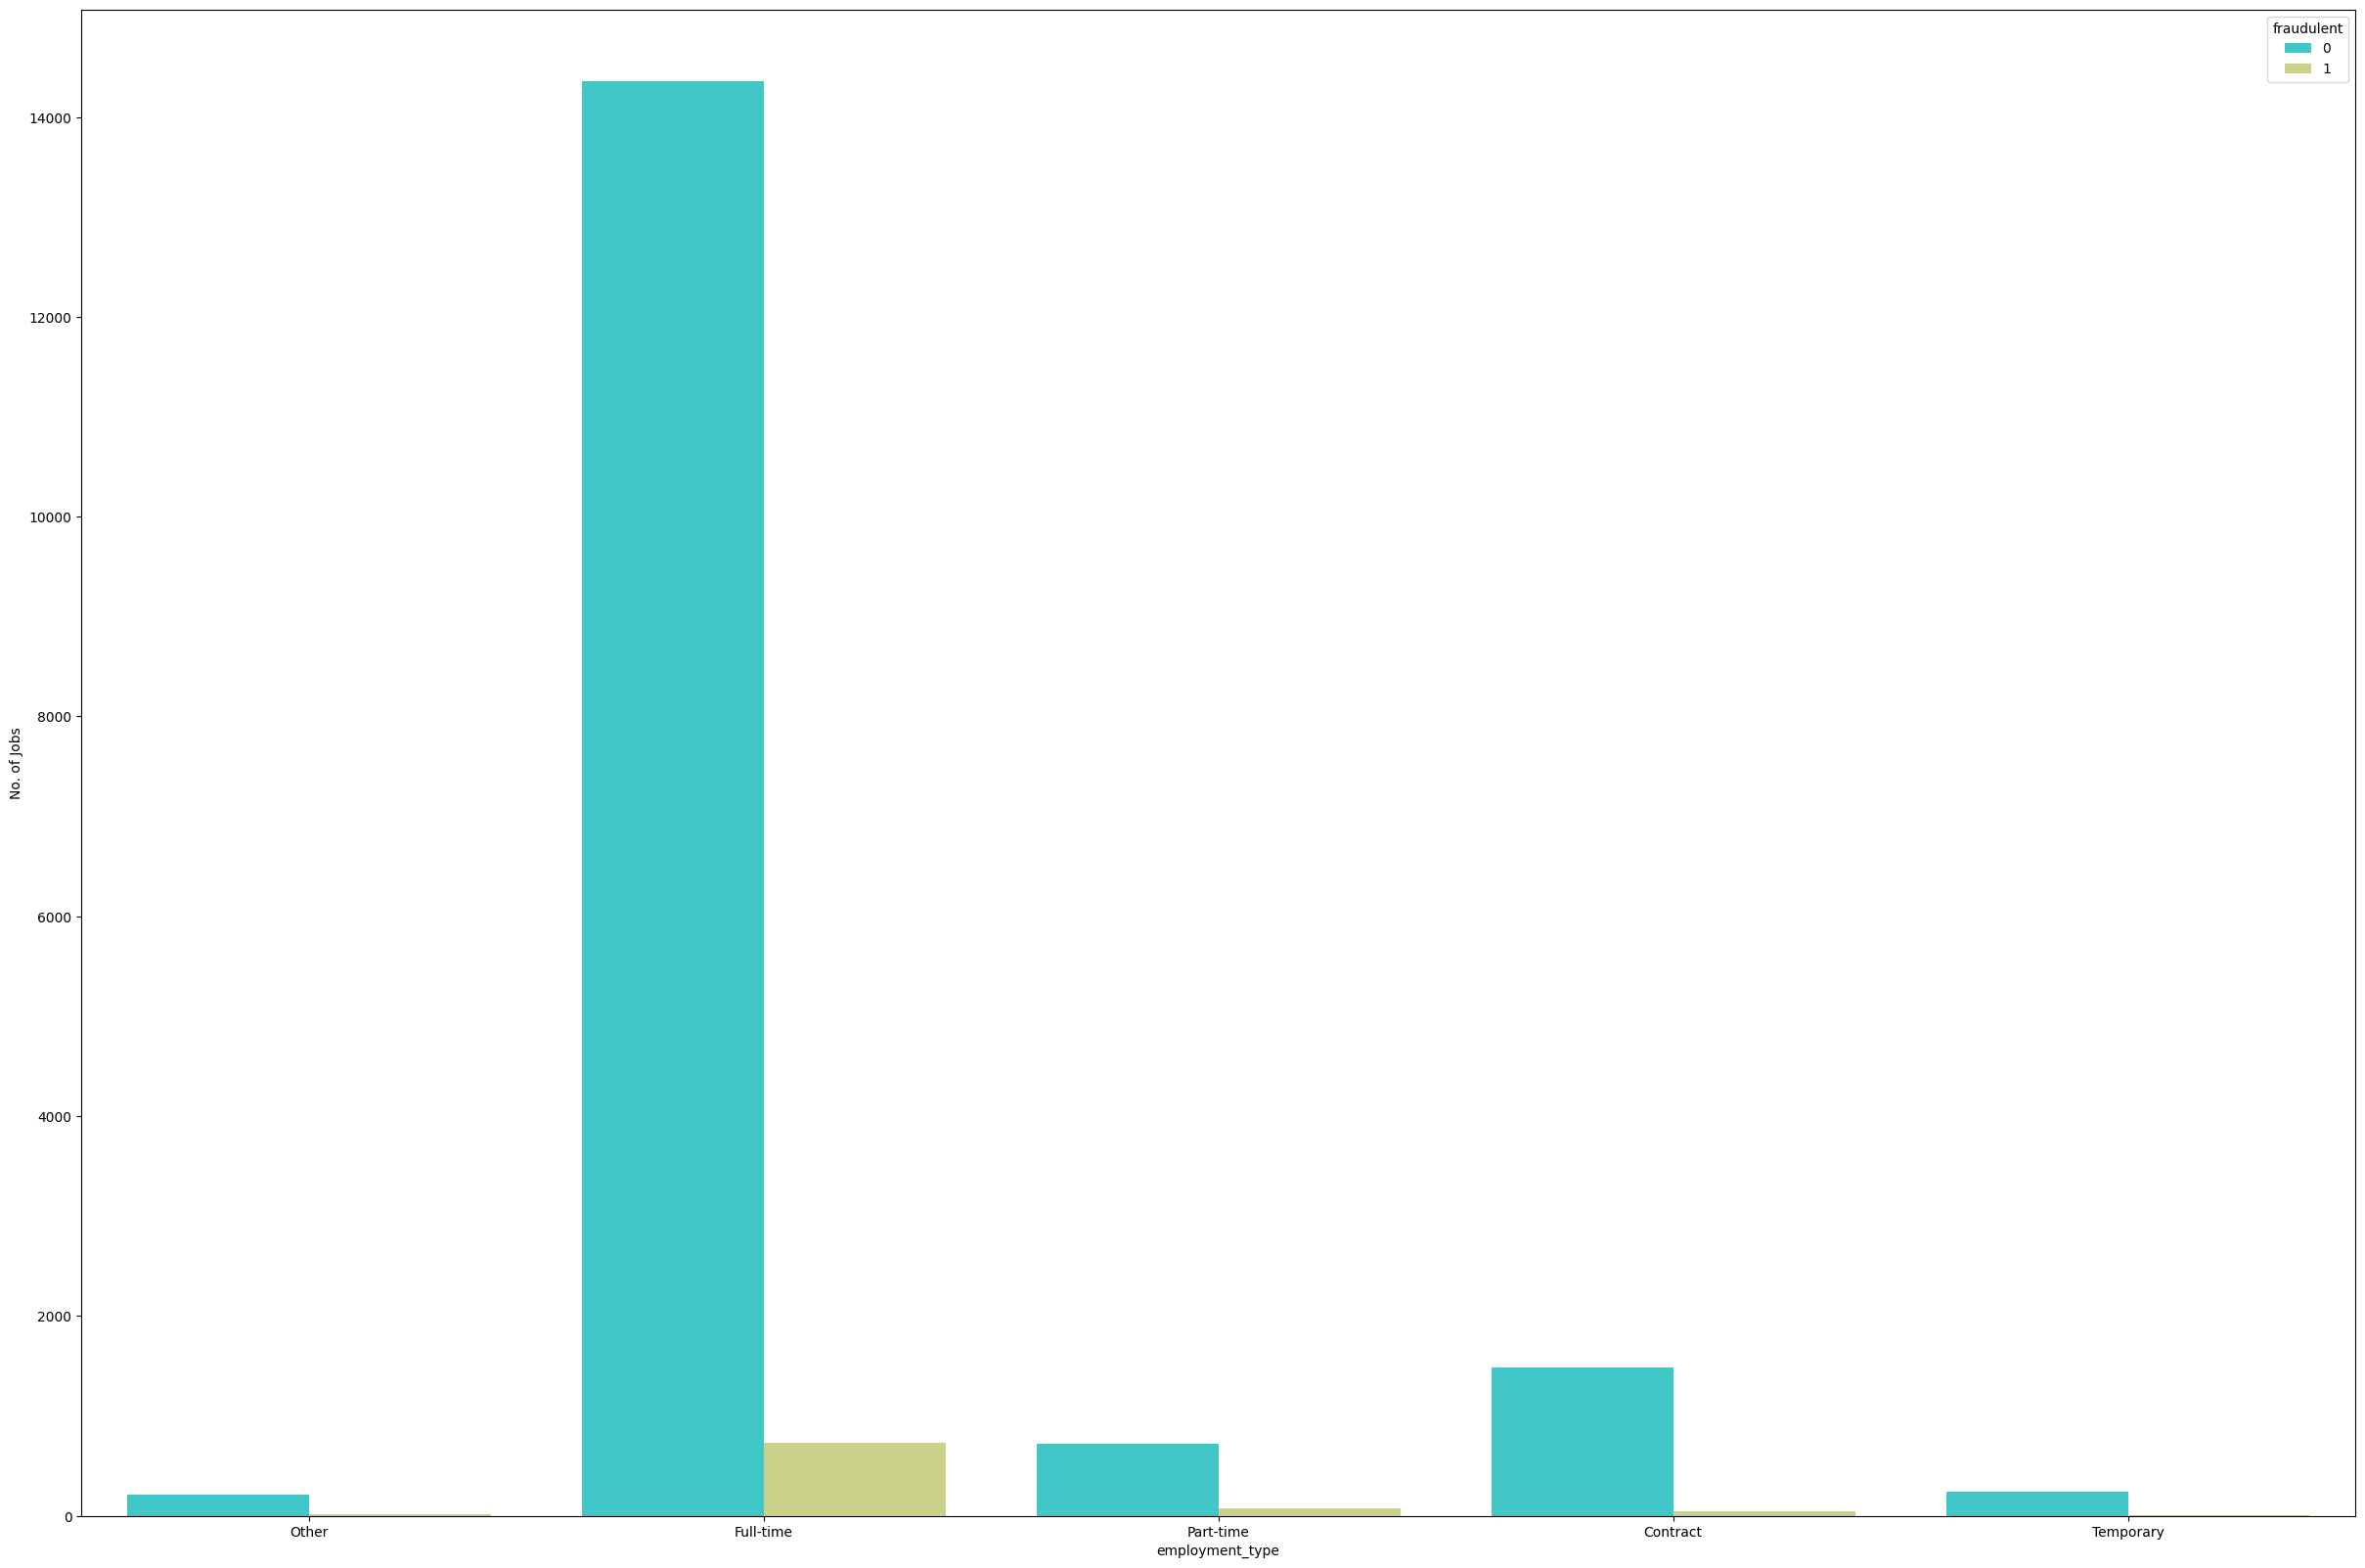

In [29]:
ax=sns.countplot(data=train, x='employment_type', hue='fraudulent',palette='rainbow')
ax.set_ylabel('No. of Jobs')

Text(0, 0.5, 'No. of Jobs')

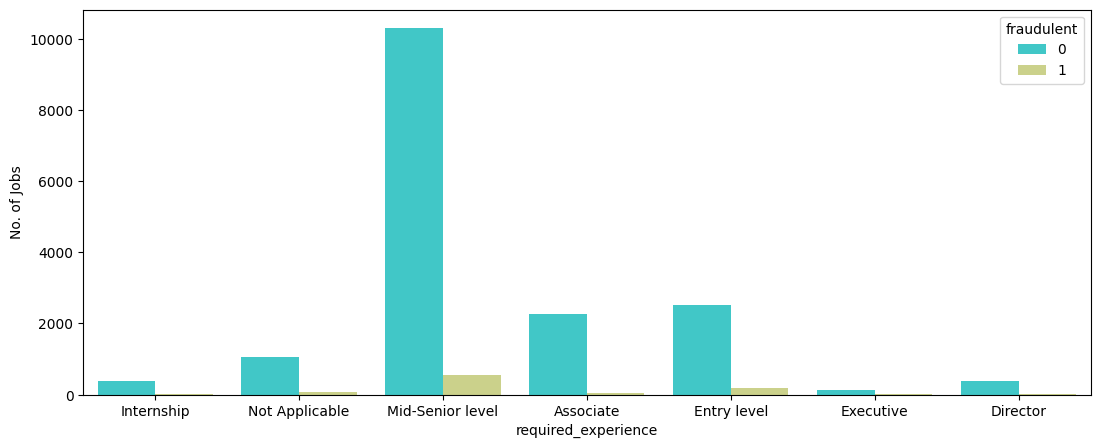

In [30]:
plt.figure(figsize=(13,5))
ax = sns.countplot(data=train, x='required_experience', hue='fraudulent', palette='rainbow')
ax.set_ylabel('No. of Jobs')

Text(0, 0.5, 'No. of Jobs')

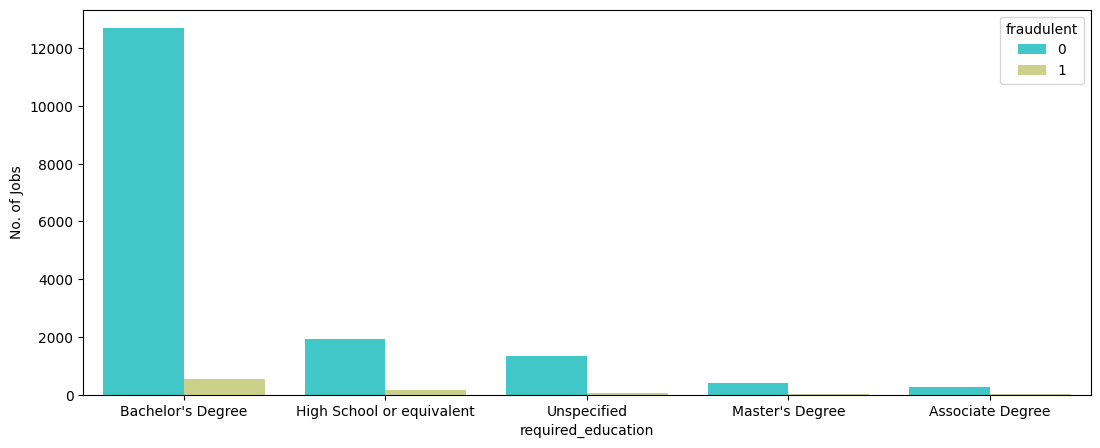

In [31]:
plt.figure(figsize=(13,5))
country = train['required_education'].value_counts().nlargest(5).index.tolist()
ax=sns.countplot(data=train, x='required_education', hue='fraudulent', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

In [32]:
train.loc[train['employment_type']=='Full-time', 'employment_type'] = 1
train.loc[train['employment_type']=='Part-time', 'employment_type'] = 2
train.loc[train['employment_type']=='Contract', 'employment_type'] = 3
train.loc[train['employment_type']=='Temporary', 'employment_type'] = 4
train.loc[train['employment_type']=='Other', 'employment_type'] = 5
train.loc[train['employment_type']=='Not Mentioned employment_type', 'employment_type'] = 6

In [33]:
train.loc[train['required_experience']=='Mid-Senior level', 'required_experience'] = 1
train.loc[train['required_experience']=='Executive', 'required_experience'] = 2
train.loc[train['required_experience']=='Entry level', 'required_experience'] = 3
train.loc[train['required_experience']=='Associate', 'required_experience'] = 4
train.loc[train['required_experience']=='Not Applicable', 'required_experience'] = 5
train.loc[train['required_experience']=='Director', 'required_experience'] = 6
train.loc[train['required_experience']=='Internship', 'required_experience'] = 7
train.loc[train['required_experience']=='Not Mentioned required_experience', 'required_experience'] = 8



In [34]:
train.loc[train['required_education']=="Master's Degree", 'required_education'] = 1
train.loc[train['required_education']=="Bachelor's Degree", 'required_education'] = 2
train.loc[train['required_education']=='Unspecified', 'required_education'] = 3
train.loc[train['required_education']=='High School or equivalent', 'required_education'] = 4
train.loc[train['required_education']=='Associate Degree', 'required_education'] = 5
train.loc[train['required_education']=='Vocational', 'required_education'] = 6
train.loc[train['required_education']=='Vocational - HS Diploma', 'required_education'] = 7
train.loc[train['required_education']=='Professional', 'required_education'] = 8
train.loc[train['required_education']=='Some High School Coursework', 'required_education'] = 9
 
train.loc[train['required_education']=='Some College Coursework Completed', 'required_education'] = 10

train.loc[train['required_education']=='Certification', 'required_education'] = 11
train.loc[train['required_education']=='Doctorate', 'required_education'] = 12
train.loc[train['required_education']=='Vocational - Degree', 'required_education'] = 13
train.loc[train['required_education']=='Not Mentioned required_education', 'required_education'] = 14

In [35]:
train.loc[train['function']=='Marketing', 'function'] = 1
train.loc[train['function']=='Customer Service', 'function'] = 2
train.loc[train['function']=='Information Technology', 'function'] = 3
train.loc[train['function']=='Sales', 'function'] = 4
train.loc[train['function']=='Health Care Provider', 'function'] = 5
train.loc[train['function']=='Management', 'function'] = 6
train.loc[train['function']=='Other', 'function'] = 7
train.loc[train['function']=='Engineering', 'function'] = 8
train.loc[train['function']=='Administrative', 'function'] = 9
train.loc[train['function']=='Design', 'function'] = 10
train.loc[train['function']=='Production', 'function'] = 11
train.loc[train['function']=='Education', 'function'] = 12
train.loc[train['function']=='Supply Chain', 'function'] = 13
train.loc[train['function']=='Business Development', 'function'] = 14
train.loc[train['function']=='Product Management', 'function'] = 15
train.loc[train['function']=='Financial Analyst', 'function'] = 16
train.loc[train['function']=='Consulting', 'function'] = 17
train.loc[train['function']=='Human Resources', 'function'] = 18

train.loc[train['function']=='Project Management', 'function'] = 22
train.loc[train['function']=='Manufacturing', 'function'] = 23
train.loc[train['function']=='Public Relations', 'function'] = 24
train.loc[train['function']=='Strategy/Planning', 'function'] = 25
train.loc[train['function']=='Advertising', 'function'] = 26
train.loc[train['function']=='Finance', 'function'] = 27
train.loc[train['function']=='General Business', 'function'] = 28
train.loc[train['function']=='Research', 'function'] = 29
train.loc[train['function']=='Accounting/Auditing', 'function'] = 30
train.loc[train['function']=='Art/Creative', 'function'] = 31
train.loc[train['function']=='Quality Assurance', 'function'] = 32
train.loc[train['function']=='Data Analyst', 'function'] = 33
train.loc[train['function']=='Business Analyst', 'function'] = 34
train.loc[train['function']=='Writing/Editing', 'function'] = 35
train.loc[train['function']=='Distribution', 'function'] = 36
train.loc[train['function']=='Science', 'function'] = 37
train.loc[train['function']=='Training', 'function'] = 38
train.loc[train['function']=='Purchasing', 'function'] = 39
train.loc[train['function']=='Legal', 'function'] = 40
train.loc[train['function']=='Not Mentioned function', 'function'] = 41

In [36]:
train

,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",0,1,0,5,7,2,1,0
1,Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,1,5,2,2,0
2,"Our client, located in Houston, is actively se...",0,1,0,1,1,2,3,0
3,THE COMPANY: ESRI â Environmental Systems Re...,0,1,0,1,1,2,4,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,1,1,2,5,0
...,...,...,...,...,...,...,...,...,...
17875,Just in case this is the first time youâve v...,0,1,1,1,1,2,4,0
17876,The Payroll Accountant will focus primarily on...,0,1,1,1,1,2,30,0
17877,Experienced Project Cost Control Staff Enginee...,0,0,0,1,1,2,3,0
17878,Nemsia Studios is looking for an experienced v...,0,0,1,3,5,8,10,0


In [37]:
text_features = train['description']


In [38]:
x=train.drop(['fraudulent','description'],axis=1)

In [39]:
x

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function
0,0,1,0,5,7,2,1
1,0,1,0,1,5,2,2
2,0,1,0,1,1,2,3
3,0,1,0,1,1,2,4
4,0,1,1,1,1,2,5
...,...,...,...,...,...,...,...
17875,0,1,1,1,1,2,4
17876,0,1,1,1,1,2,30
17877,0,0,0,1,1,2,3
17878,0,0,1,3,5,8,10


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
# from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from scipy.sparse import hstack



In [41]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
text_tfidf = tfidf.fit_transform(text_features)  # sparse matrixA



In [42]:
x = x.apply(pd.to_numeric, errors='coerce')


In [43]:
from scipy.sparse import hstack

# Convert x (numeric DataFrame) to array
x_numeric = x.values  # Convert to dense matrix
X_combined = hstack([text_tfidf, x_numeric])  # sparse + dense matrix


In [44]:
y = train['fraudulent']

In [45]:
from imblearn.over_sampling import RandomOverSampler
ro=RandomOverSampler()
x_data,y_data=ro.fit_resample(X_combined, y)

In [46]:
from collections import Counter
print("Actual Data:",Counter(y))

Actual Data: Counter({0: 17014, 1: 866})


In [47]:
print("Artificial Data:",Counter(y_data))

Artificial Data: Counter({0: 17014, 1: 17014})


In [48]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=42)


In [49]:
from sklearn.neural_network import MLPClassifier

In [50]:
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam')


In [51]:

clf.fit(X_train, y_train)


MLPClassifier(max_iter=300)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [53]:
print(clf.score(X_train,y_train))

0.9999265300124899


In [54]:
y_pred = clf.predict(X_test)
test_score=accuracy_score(y_test,y_pred)
print(test_score)

0.9895680282104026


In [55]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3396
           1       0.98      1.00      0.99      3410

    accuracy                           0.99      6806
   macro avg       0.99      0.99      0.99      6806
weighted avg       0.99      0.99      0.99      6806



In [56]:
y_pred = clf.predict(X_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[3325,   71],
       [   0, 3410]], dtype=int64)

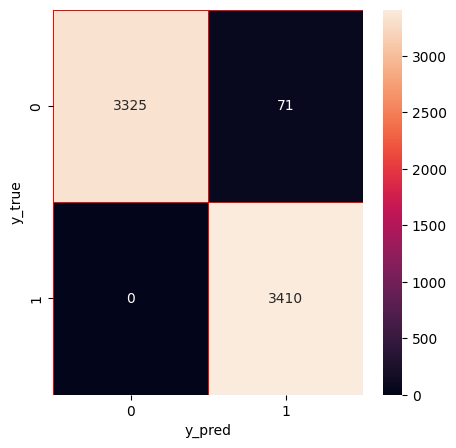

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [58]:
# sample = {
#     'description': ["Work from home data entry role for experienced candidates."],
#     'telecommuting': [1],
#     'has_company_logo': [1],
#     'has_questions': [0],
#     'employment_type': [2],
#     'required_experience': [3],
#     'required_education': [1],
#     'function': [5]
# }

# import pandas as pd
# sample_df = pd.DataFrame(sample)

# # Transform text and numeric part
# sample_text_tfidf = tfidf.transform(sample_df['description'])
# sample_numeric = sample_df.drop('description', axis=1).values
# sample_combined = hstack([sample_text_tfidf, sample_numeric])

# # Predict
# sample_pred = clf.predict(sample_combined)
# print("Sample Prediction:", "Fraudulent" if sample_pred[0] == 1 else "Legitimate")


In [59]:
import pickle

pickle.dump(clf,open('mlp.pkl','wb'))
mlp = pickle.load(open('mlp.pkl','rb'))

In [60]:
import pickle

pickle.dump(tfidf,open('tfidf.pkl','wb'))
tfidf = pickle.load(open('tfidf.pkl','rb'))

In [61]:
from sklearn.linear_model import PassiveAggressiveClassifier
Model = PassiveAggressiveClassifier()

In [62]:
Model.fit(X_train, y_train)


PassiveAggressiveClassifier()

In [63]:
print(Model.score(X_train,y_train))

0.9854529424729997


In [64]:
y_pred = Model.predict(X_test)
test_score=accuracy_score(y_test,y_pred)
print(test_score)

0.9776667646194535


In [65]:
import sklearn.metrics

In [66]:
y_pred = Model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3396
           1       0.98      0.98      0.98      3410

    accuracy                           0.98      6806
   macro avg       0.98      0.98      0.98      6806
weighted avg       0.98      0.98      0.98      6806



In [67]:
y_pred = Model.predict(X_test )
y_true=y_test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm


array([[3315,   81],
       [  71, 3339]], dtype=int64)

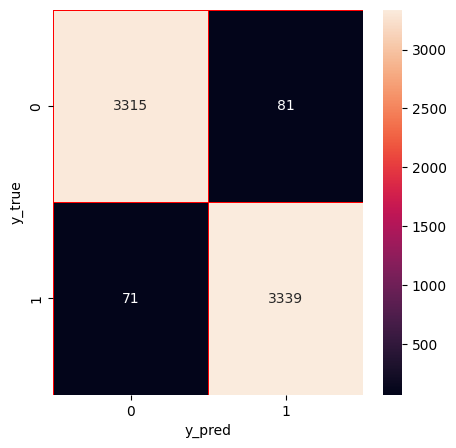

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [69]:
import pickle

pickle.dump(Model,open('Passive.pkl','wb'))
Passive = pickle.load(open('Passive.pkl','rb'))

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
nb=GradientBoostingClassifier()

In [71]:
nb.fit(X_train, y_train)


GradientBoostingClassifier()

In [72]:
print(nb.score(X_train,y_train))

0.9233340680332084


In [73]:
y_pred = nb.predict(X_test)
test_score=accuracy_score(y_test,y_pred)
print(test_score)

0.9181604466647076


In [74]:


y_pred = nb.predict(X_test )
y_true=y_test

In [75]:

y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3396
           1       0.90      0.94      0.92      3410

    accuracy                           0.92      6806
   macro avg       0.92      0.92      0.92      6806
weighted avg       0.92      0.92      0.92      6806



In [76]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[3047,  349],
       [ 208, 3202]], dtype=int64)

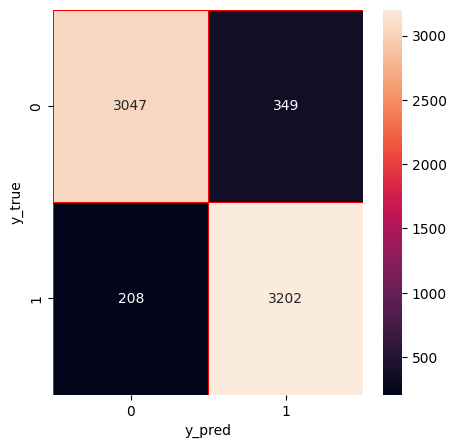

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [78]:

import pickle

pickle.dump(nb,open('Gradient.pkl','wb'))
Gradient = pickle.load(open('Gradient.pkl','rb'))